## **Librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist

## **Datos**

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(60000, 28, 28)

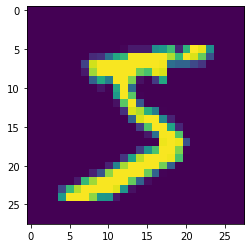

In [ ]:
plt.imshow(train_data[0])
plt.show()

## **Modelo**

### **Construcción del Modelo**

In [ ]:
# Inicializamos nuestra red neuronal
model = models.Sequential()

In [ ]:
# Agregamos capas a nuestra red neuronal
model.add(
    layers.Dense(
        512, 
        activation='relu', 
        input_shape=(28*28,)
      )
  )

model.add(
    layers.Dense(
        10,
        activation='softmax'
    )
)

In [ ]:
# Compilamos nuestra red neuronal
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Resumen de nuestra red neuronal
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### **Entrenamiento del modelo**

In [ ]:
# Ajustamos la forma de nuestra sabana de variables independientes
X_train = train_data.reshape((60000, 28*28))
X_train = X_train.astype('float32')/255

X_test = test_data.reshape((10000, 28*28))
X_test = X_test.astype('float32')/255

In [ ]:
# Convertimos en dummies nuestra variable dependiente
y_train = to_categorical(train_labels)

y_test = to_categorical(test_labels)

In [ ]:
# Entrenamos el modelo
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.2596 - accuracy: 0.9242
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1033 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0677 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0495 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0374 - accuracy: 0.9889


In [ ]:
# Evaluamos el modelo
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0739 - accuracy: 0.9777


[0.07387911528348923, 0.9776999950408936]